#Spelling error

To fix spelling errors, the usual approach is to make modifications in the selected word and compare with existing words in a dictionary. If a modified version of the word is found in the dictionary, then it is a candidate to fix the misspelled word.

Modifications that can be made to a word can be:

    Add one letter (insert)
    Delete one letter (delete)
    Replace one letter for another one (replace)
    Swaps two adjacent letters (transpose)


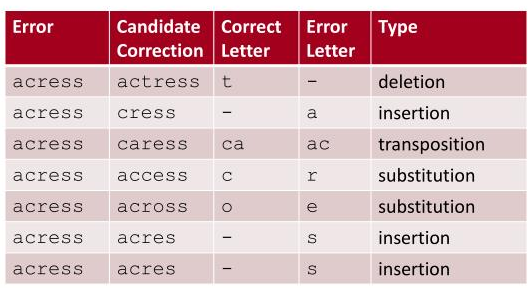

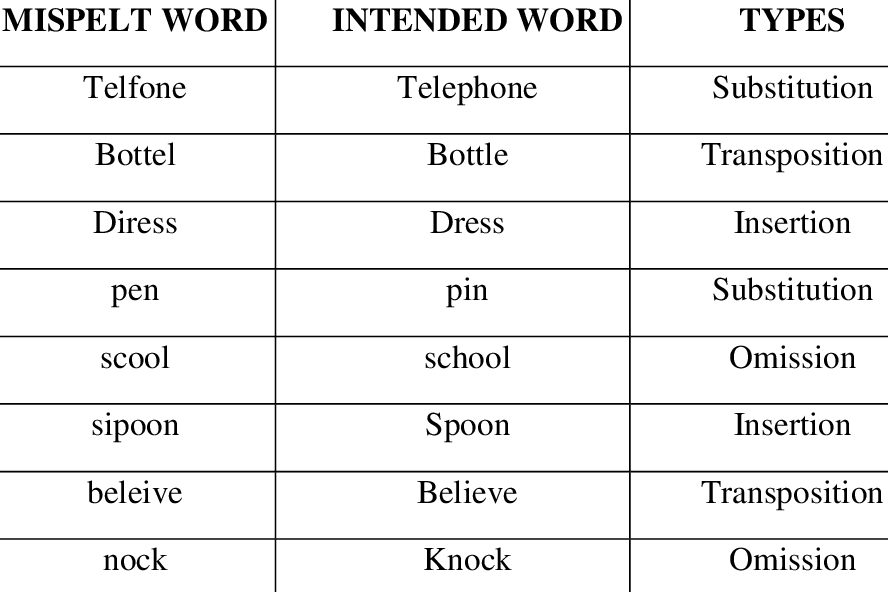

In [ ]:
#Code 1

In [ ]:
#Basic methods

def find_correction(word, dictionary):
    suggestions = []

    # Deletion
    for i in range(len(word)):
        deletion = word[:i] + word[i+1:]
        if deletion in dictionary:
            suggestions.append(deletion)

    # Insertion
    for i in range(len(word) + 1):
        for char in 'abcdefghijklmnopqrstuvwxyz':
            insertion = word[:i] + char + word[i:]
            if insertion in dictionary:
                suggestions.append(insertion)

    # Alteration
    for i in range(len(word)):
        for char in 'abcdefghijklmnopqrstuvwxyz':
            alteration = word[:i] + char + word[i+1:]
            if alteration in dictionary:
                suggestions.append(alteration)

    # Modification
    for i in range(len(word)):
        for char in 'abcdefghijklmnopqrstuvwxyz':
            modification = word[:i] + char + word[i+1:]
            if modification in dictionary:
                suggestions.append(modification)

    return suggestions

In [ ]:
misspelled_word = "text"

In [ ]:
dictionary = {"test", "text", "tenth", "tent", "toast"}

In [ ]:
corrections = find_correction(misspelled_word, dictionary)
if corrections:
    print("Possible corrections for '{}':".format(misspelled_word))
    for correction in corrections:
        print(correction)
else:
    print("No corrections found for '{}'. Check dictionary or input word.".format(misspelled_word))

Possible corrections for 'teskt':
test


In [ ]:
# Noisy Channel Model" in NLP

The noisy channel model is used in NLP for spelling correction and machine translation.
The key idea is to find the most likely correct word given an observed (potentially incorrect) word.

Let's break this down:

    c is the correct word
    o is the observed (potentially incorrect) word

Using Bayes' rule:
P(c|o) = P(o|c)P(c) / P(o)

P(c|o) is the posterior probability of c given o that we want to maximize.

P(o|c) is the channel model - the probability of observing o given the correct word is c. This models spelling mistakes and errors.

P(c) is the prior probability of word c. This can be estimated from a corpus.

P(o) is the prior probability of o. This can often be ignored as it's the same for all c.

So the implementation focuses on calculating P(o|c) and P(c).

In [ ]:
#Probability of Words in series

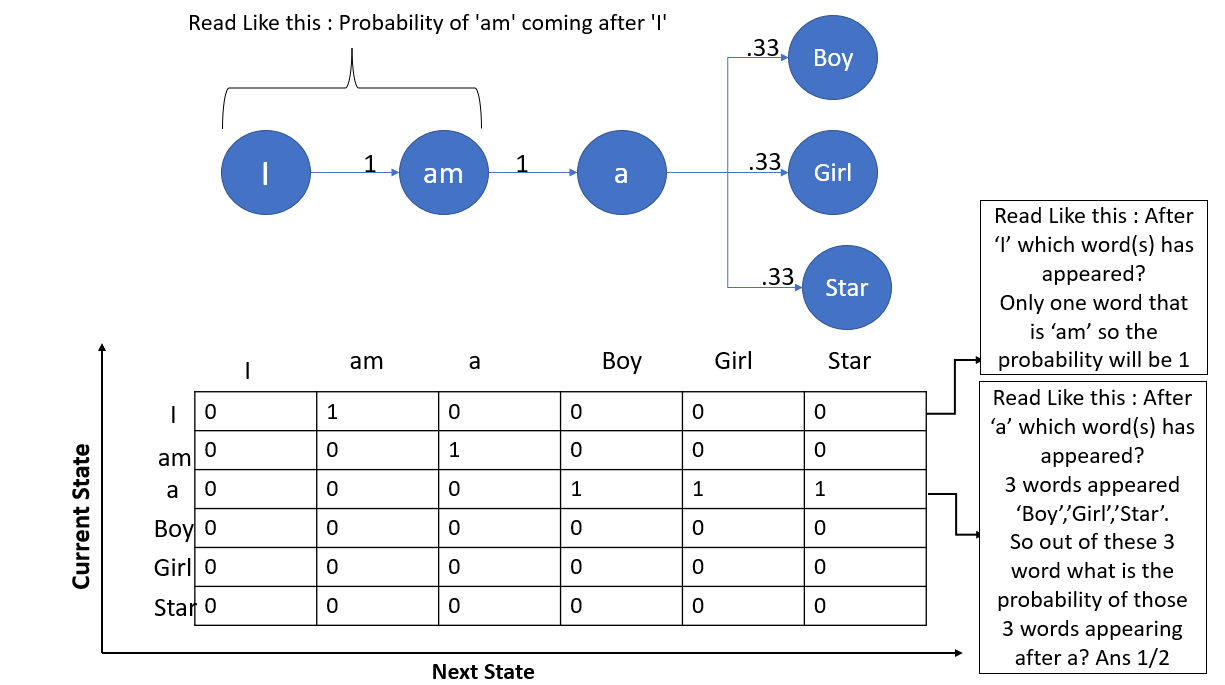

In [ ]:
import math
from collections import defaultdict

corpus = ["the", "quick", "brown", "fox", "jumped", "over", "the", "lazy", "dog"]

channel_model = {
    "the": {"the": 0.7, "teh": 0.2, "hte": 0.1},
    "quick": {"quick": 0.8, "qwik": 0.15, "quik": 0.05},
    "brown": {"brown": 0.95, "browm": 0.05},
    "fox": {"fox": 0.9, "fix": 0.1},
    "jumped": {"jumped": 0.8, "jupmed": 0.2},
    "over": {"over": 0.9, "ober": 0.1},
    "lazy": {"lazy": 0.7, "laxy": 0.3},
    "dog": {"dog": 1.0}
}

word_counts = defaultdict(int)
for word in corpus:
    word_counts[word] += 1

total_words = len(corpus)

def get_prior(word):
    return word_counts[word] / total_words





def noisy_channel_model(observed_word):
    best_p = 0
    best_word = observed_word
    for candidate in channel_model:
        prior = get_prior(candidate)
        p_o_given_c = channel_model[candidate].get(observed_word, 0.0001)
        posterior = p_o_given_c * prior
        if posterior > best_p:
            best_p = posterior
            best_word = candidate
    return best_word

print(noisy_channel_model("teh"))
print(noisy_channel_model("qwik"))
print(noisy_channel_model("fix"))

the
quick
fox


In [ ]:

import numpy as np

class NoisyChannelModel:
    def __init__(self, vocab, edit_prob):
        """
        Initialize the Noisy Channel Model.

        Parameters:
        - vocab (list): List of vocabulary words.
        - edit_prob (dict): Dictionary representing probabilities of different edits.
                            Keys: tuple of (edit_type, from_char, to_char)
                            Values: probability of that edit
        """
        self.vocab = vocab
        self.edit_prob = edit_prob

    def edit_distance(self, word1, word2):
        """
        Compute the edit distance between two words using dynamic programming.

        Parameters:
        - word1 (str): First word.
        - word2 (str): Second word.

        Returns:
        - int: Edit distance between the two words.
        """
        m = len(word1)
        n = len(word2)

        dp = np.zeros((m + 1, n + 1))

        for i in range(m + 1):
            dp[i][0] = i
        for j in range(n + 1):
            dp[0][j] = j

        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if word1[i - 1] == word2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1]
                else:
                    dp[i][j] = 1 + min(dp[i - 1][j],      # Deletion
                                       dp[i][j - 1],      # Insertion
                                       dp[i - 1][j - 1])  # Substitution

        return dp[m][n]

    def generate_candidates(self, word):
        """
        Generate candidate corrections for a given misspelled word by considering
        all possible edits (deletions, insertions, substitutions, and transpositions)
        with edit distance of 1.

        Parameters:
        - word (str): Misspelled word.

        Returns:
        - list: List of candidate corrections.
        """
        candidates = set()
        alphabet = 'abcdefghijklmnopqrstuvwxyz'

        # Deletions
        for i in range(len(word)):
            candidates.add(word[:i] + word[i+1:])

        # Insertions
        for i in range(len(word) + 1):
            for c in alphabet:
                candidates.add(word[:i] + c + word[i:])

        # Substitutions
        for i in range(len(word)):
            for c in alphabet:
                candidates.add(word[:i] + c + word[i+1:])

        # Transpositions
        for i in range(len(word) - 1):
            candidates.add(word[:i] + word[i+1] + word[i] + word[i+2:])

        return list(candidates)

    def correct_spelling(self, word):
        """
        Correct the spelling of a word using the Noisy Channel Model.

        Parameters:
        - word (str): Misspelled word.

        Returns:
        - str: Corrected word.
        """
        if word in self.vocab:
            return word

        candidates = self.generate_candidates(word)
        best_candidate = word
        min_distance = float('inf')

        for candidate in candidates:
            if candidate in self.vocab:
                distance = self.edit_distance(word, candidate)
                if distance < min_distance:
                    min_distance = distance
                    best_candidate = candidate

        return best_candidate

# Example Usage:
vocab = {'apple', 'banana', 'orange', 'peach', 'pear'}
edit_probabilities = {
    ('substitution', 'a', 'e'): 0.1,
    ('substitution', 'e', 'a'): 0.1,
    ('substitution', 'o', 'a'): 0.1,
    ('substitution', 'a', 'o'): 0.1,
    ('insertion', '', 'e'): 0.05,
    ('insertion', '', 'o'): 0.05,
    ('deletion', 'a', ''): 0.05,
    ('deletion', 'e', ''): 0.05,
    ('deletion', 'o', ''): 0.05
}

ncm = NoisyChannelModel(vocab, edit_probabilities)
misspelled_word = 'Mang'
corrected_word = ncm.correct_spelling(misspelled_word)
print(f"Misspelled Word: {misspelled_word}")
print(f"Corrected Word: {corrected_word}")


Misspelled Word: Mang
Corrected Word: Mang


In [ ]:
#Using insertion probability

In [ ]:
import numpy as np

class NoisyChannelModel:
    def __init__(self, vocab, insert_prob):
        """
        Initialize the Noisy Channel Model.

        Parameters:
        - vocab (list): List of vocabulary words.
        - insert_prob (dict): Dictionary representing probabilities of insertions.
                              Keys: to_char
                              Values: probability of insertion of that character
        """
        self.vocab = vocab
        self.insert_prob = insert_prob

    def edit_distance(self, word1, word2):
        """
        Compute the edit distance between two words using dynamic programming.

        Parameters:
        - word1 (str): First word.
        - word2 (str): Second word.

        Returns:
        - int: Edit distance between the two words.
        """
        m = len(word1)
        n = len(word2)

        dp = np.zeros((m + 1, n + 1))

        for i in range(m + 1):
            dp[i][0] = i
        for j in range(n + 1):
            dp[0][j] = j

        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if word1[i - 1] == word2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1]
                else:
                    dp[i][j] = 1 + min(dp[i - 1][j],      # Deletion
                                       dp[i][j - 1],      # Insertion
                                       dp[i - 1][j - 1])  # Substitution

        return dp[m][n]

    def generate_candidates(self, word):
        """
        Generate candidate corrections for a given misspelled word by considering
        all possible insertions with edit distance of 1.

        Parameters:
        - word (str): Misspelled word.

        Returns:
        - list: List of candidate corrections.
        """
        candidates = set()
        alphabet = 'abcdefghijklmnopqrstuvwxyz'

        # Insertions
        for i in range(len(word) + 1):
            for c in alphabet:
                candidates.add(word[:i] + c + word[i:])

        return list(candidates)

    def correct_spelling(self, word):
        """
        Correct the spelling of a word using the Noisy Channel Model.

        Parameters:
        - word (str): Misspelled word.

        Returns:
        - str: Corrected word.
        """
        if word in self.vocab:
            return word

        candidates = self.generate_candidates(word)
        best_candidate = word
        min_distance = float('inf')

        for candidate in candidates:
            if candidate in self.vocab:
                distance = self.edit_distance(word, candidate)
                if distance < min_distance:
                    min_distance = distance
                    best_candidate = candidate

        return best_candidate

# Example Usage:
vocab = {'apple', 'banana', 'orange', 'peach', 'pear'}
insertion_probabilities = {
    'e': 0.1,
    'o': 0.1,
    'a': 0.1,
}

ncm = NoisyChannelModel(vocab, insertion_probabilities)
misspelled_word = 'appl'
corrected_word = ncm.correct_spelling(misspelled_word)
print(f"Misspelled Word: {misspelled_word}")
print(f"Corrected Word: {corrected_word}")


Misspelled Word: appl
Corrected Word: apple


In [ ]:
!sudo pip install -U nltk

**Corpus**

Body of text, singular. Corpora is the plural of this. Example: A collection of medical journals.

In [ ]:
import nltk
from nltk.corpus import gutenberg

# Load the Gutenberg corpus
nltk.download('gutenberg')

# Get the file IDs present in the Gutenberg corpus
file_ids = gutenberg.fileids()

# Print the first few file IDs
print("File IDs in the Gutenberg Corpus:")
print(file_ids[:1000])  # Print the first 5 file IDs

File IDs in the Gutenberg Corpus:
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
# Select a specific file from the corpus
selected_file = 'shakespeare-hamlet.txt'

# Get the raw text of the selected file
raw_text = gutenberg.raw(selected_file)

# Print the first 500 characters of the raw text
print("\nFirst 500 characters of the selected text:")
print(raw_text[:500])


First 500 characters of the selected text:
[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Word Tokenization:

from nltk.tokenize import word_tokenize

text = "NLTK is a powerful library for natural language processing."
x = word_tokenize(text)
print(x)

['NLTK', 'is', 'a', 'powerful', 'library', 'for', 'natural', 'language', 'processing', '.']


In [ ]:
x[0]

'NLTK'

In [ ]:
x[1]

'is'

In [ ]:
#Sentence Tokenization:

from nltk.tokenize import sent_tokenize

text = "NLTK is a powerful library for natural language processing. It provides various tools and methods for text analysis."
sentences = sent_tokenize(text)
print(sentences)

['NLTK is a powerful library for natural language processing.', 'It provides various tools and methods for text analysis.']


In [ ]:
sentences[0]

'NLTK is a powerful library for natural language processing.'

In [ ]:
sentences[1]

'It provides various tools and methods for text analysis.'

In [ ]:
#Whitespace Tokenization:

text = "NLTK   is a.powerful  library."
tokens = text.split()
print(tokens)

['NLTK', 'is', 'a.powerful', 'library.']


In [ ]:
#Corpus by token
# Tokenize the raw text into words
words = nltk.word_tokenize(raw_text)

# Print the first 10 words
print("\nFirst 10 words:")
print(words[:10])



# Perform some basic text analysis
total_words = len(words)
unique_words = len(set(words))
lexical_diversity = unique_words / total_words

print("\nText Analysis:")
print(f"Total words: {total_words}")
print(f"Unique words: {unique_words}")
print(f"Lexical diversity: {lexical_diversity:.2f}")


#Regular Expression Tokenization:
Regular Expression (regex) tokenization involves splitting text based on patterns defined by regular expressions. This method allows for more customized tokenization compared to simpler approaches like word or sentence tokenization. Regular expressions can specify complex patterns of characters, which makes them powerful for tokenizing text in various formats.



In [ ]:
import re

text = "NLTK, is a powerful library. It helps in natural language processing; regex too!"
tokens = re.split(r'[,.;]', text)
print(tokens)


['NLTK', ' is a powerful library', ' It helps in natural language processing', ' regex too!']


In [ ]:
#Treebank Tokenization:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
text = "NLTK is a powerful library for natural language processing."
tokens = tokenizer.tokenize(text)
print(tokens)

['NLTK', 'is', 'a', 'powerful', 'library', 'for', 'natural', 'language', 'processing', '.']


**Parts of Speech**

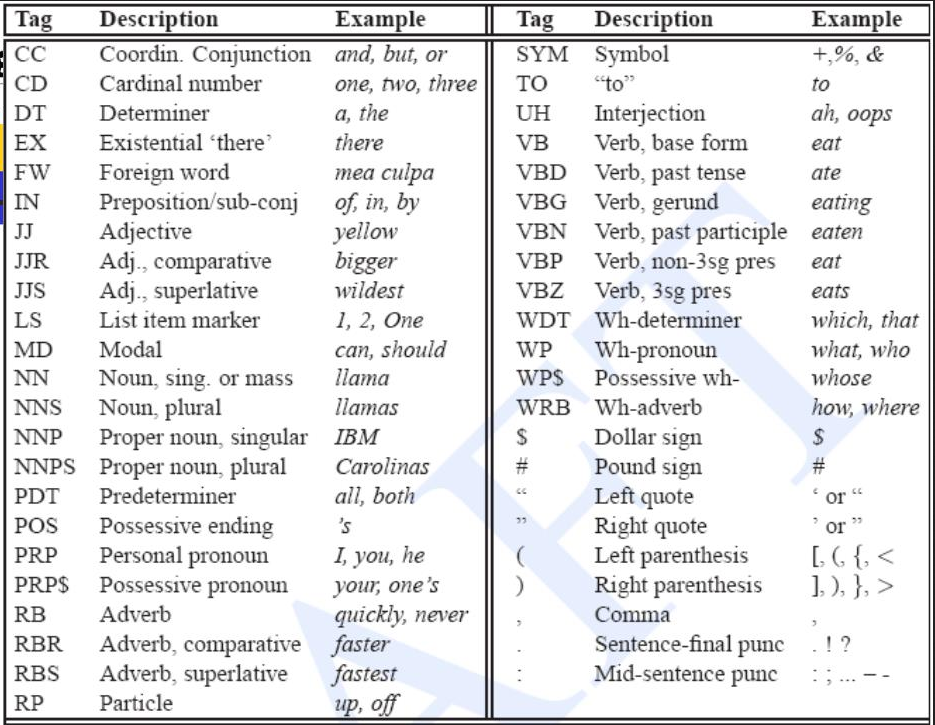

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

# Sample sentence
sentence = "I am learning Python programming."

# Tokenize the sentence into words
words = word_tokenize(sentence)

# Perform part-of-speech tagging
pos_tags = pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


The pos_tag function assigns a part-of-speech tag to each word in the tokenized sentence. It returns a list of tuples where each tuple contains a word from the sentence and its corresponding part-of-speech tag.

In [ ]:
# Print the result
print(pos_tags)

[('I', 'PRP'), ('am', 'VBP'), ('learning', 'VBG'), ('Python', 'NNP'), ('programming', 'NN'), ('.', '.')]


    'I' is tagged as 'PRP', which stands for personal pronoun.
    'am' is tagged as 'VBP', which stands for verb, present tense, not 3rd person singular.
    'learning' is tagged as 'VBG', which stands for verb, gerund or present participle.
    'Python' is tagged as 'NNP', which stands for proper noun, singular.
    'programming' is tagged as 'NN', which stands for noun, singular or mass.
    '.' is tagged as . which stands for punctuation.



**Unigram POS Tagger**


A Unigram POS Tagger is a type of part-of-speech (POS) tagger that assigns tags to words based solely on the individual words themselves, without considering the surrounding context. In other words, it relies on the probability of a word being associated with a particular tag based on its appearance in a training corpus.

Here's how the Unigram POS Tagger works:
Training: The Unigram tagger is trained on a tagged corpus, which consists of sentences where each word is already tagged with its corresponding part-of-speech. During training, the tagger builds a dictionary of words and their associated tags, along with the frequency of each word-tag pair in the corpus.
Tagging: When presented with new, unseen text, the Unigram tagger assigns a part-of-speech tag to each word based on the most frequent tag(s) associated with that word in the training corpus. It assigns the tag that maximizes the probability of the word given the tag.

The Unigram tagger is straightforward and computationally efficient since it only considers the frequency of individual words and their tags. However, it may not capture the contextual information that influences the choice of a word's part-of-speech in a given sentence. Therefore, its accuracy may be lower compared to taggers that consider surrounding context, such as Bigram or Brill taggers.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import UnigramTagger
nltk.download('treebank')

# Sample sentence
sentence = "I am learning Python programming."

# Tokenize the sentence into words
words = word_tokenize(sentence)

# Train a Unigram tagger using a tagged corpus
tagged_corpus = nltk.corpus.treebank.tagged_sents()
unigram_tagger = UnigramTagger(tagged_corpus)

# Perform POS tagging using the Unigram tagger
pos_tags = unigram_tagger.tag(words)

print(pos_tags)


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


[('I', 'PRP'), ('am', 'VBP'), ('learning', 'NN'), ('Python', None), ('programming', 'NN'), ('.', '.')]


**Bigram POS Tagger**

A Bigram POS Tagger, also known as a Bigram tagger, is a type of part-of-speech (POS) tagger that considers the immediate context of each word in addition to the word itself when assigning POS tags. Specifically, it looks at pairs of consecutive words (bigrams) in a sentence to determine the most likely POS tag for each word.

Here's how the Bigram POS Tagger works:
Training: Similar to the Unigram tagger, the Bigram tagger is trained on a tagged corpus, where each word is tagged with its corresponding part-of-speech. During training, the tagger builds a model that calculates the probability of a word being associated with a particular tag based on the word itself and the tag of the preceding word (bigram).
Tagging: When presented with new, unseen text, the Bigram tagger analyzes each word in the sentence along with the POS tag of the preceding word. It then assigns the POS tag that maximizes the probability of the word given the tag of the preceding word. This process is repeated for each word in the sentence.

By considering the context provided by the preceding word, the Bigram POS Tagger can sometimes make more accurate tagging decisions compared to the Unigram tagger, especially in cases where the choice of POS tag depends heavily on the surrounding words. However, the accuracy of the Bigram tagger may still be limited by the local context it considers.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import BigramTagger

# Sample sentence
sentence = "I am learning Python programming."

# Tokenize the sentence into words
words = word_tokenize(sentence)

# Train a Bigram tagger using a tagged corpus
tagged_corpus = nltk.corpus.treebank.tagged_sents()
bigram_tagger = BigramTagger(tagged_corpus)

# Perform POS tagging using the Bigram tagger
pos_tags = bigram_tagger.tag(words)

print(pos_tags)


[('I', 'PRP'), ('am', 'VBP'), ('learning', None), ('Python', None), ('programming', None), ('.', None)]


**The Brill POS Tagger**



It is also known as the BrillTagger, is a type of part-of-speech (POS) tagger that utilizes transformation-based learning to improve the accuracy of POS tagging. It was introduced by Eric Brill in 1992 and is based on the idea of error-driven learning.

Here's how the Brill POS Tagger works:
Initial Tagging: The Brill tagger starts with an initial tagging of words in a given text. This initial tagging could be done using a simpler tagger such as a Unigram or Bigram tagger.

Error Identification: The Brill tagger then identifies errors in the initial tagging. These errors occur when the assigned tags do not match the actual tags of the words in the text.
Rule Generation: Based on the identified errors, the Brill tagger generates transformation rules. These rules specify how the tagger should change the assigned tags of certain words to correct the errors. The rules are typically in the form of patterns that match word/tag sequences and specify the correct tag to be assigned.
Rule Application: The Brill tagger applies the generated transformation rules to the initial tagging. It iteratively applies the rules to the text, updating the tagging at each step to correct errors.
Evaluation: After applying a set of transformation rules, the Brill tagger evaluates the updated tagging to see if the errors have been reduced. If errors remain, the tagger may generate additional rules and continue the iterative process of rule application and evaluation until a satisfactory level of accuracy is achieved.

The Brill POS Tagger is known for its ability to learn from its mistakes and iteratively improve the tagging accuracy based on the training data. It can incorporate linguistic knowledge and domain-specific rules to handle complex tagging scenarios. However, building an effective set of transformation rules can require considerable expertise and manual effort.

In [ ]:
import nltk
from nltk.tag import brill, brill_trainer
from nltk.tag import UnigramTagger
from nltk.corpus import treebank

# Training data
train_data = treebank.tagged_sents()[:3000]

# Initial tagger (Unigram Tagger)
initial_tagger = UnigramTagger(train_data)

# Brill tagger trainer
templates = brill.brill24()
trainer = brill_trainer.BrillTaggerTrainer(initial_tagger, templates)

# Train the Brill POS tagger
brill_tagger = trainer.train(train_data)

# Test the Brill POS tagger
test_sentence = "This is an example sentence."
tokens = nltk.word_tokenize(test_sentence)
tagged_sentence = brill_tagger.tag(tokens)

print(tagged_sentence)


[('This', 'DT'), ('is', 'VBZ'), ('an', 'DT'), ('example', 'NN'), ('sentence', None), ('.', '.')]


**Lexicon**


Words and their meanings. Example: English dictionary. Consider, however, that various fields will
have different lexicons. For example: To a financial investor, the first meaning for the word "Bull" is
someone who is confident about the market, as compared to the common English lexicon, where
the first meaning for the word "Bull" is an animal. As such, there is a special lexicon for financial
investors, doctors, children, mechanics, and so on

In [ ]:
from nltk.corpus import wordnet
nltk.download('wordnet')
# Get synonyms of a word
synonyms = []
for syn in wordnet.synsets("happy"):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
print("Synonyms of 'happy':", set(synonyms))

# Get antonyms of a word
antonyms = []
for syn in wordnet.synsets("happy"):
    for lemma in syn.lemmas():
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
print("Antonyms of 'happy':", set(antonyms))


[nltk_data] Downloading package wordnet to /root/nltk_data...


Synonyms of 'happy': {'glad', 'happy', 'felicitous', 'well-chosen'}
Antonyms of 'happy': {'unhappy'}


**Frequency Distribution** to Count the Most Common Lexical Categories

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Sample text
text = "NLTK (Natural Language Toolkit) is a leading Natural language processing platform for building Python programs to work with human language data."

# Tokenize the text into words
words = word_tokenize(text)

# Create a frequency distribution of words
freq_dist = FreqDist(words)

# Print the frequency distribution
print("Frequency Distribution:")
print(freq_dist.most_common())


Frequency Distribution:
[('Natural', 2), ('language', 2), ('NLTK', 1), ('(', 1), ('Language', 1), ('Toolkit', 1), (')', 1), ('is', 1), ('a', 1), ('leading', 1), ('processing', 1), ('platform', 1), ('for', 1), ('building', 1), ('Python', 1), ('programs', 1), ('to', 1), ('work', 1), ('with', 1), ('human', 1), ('data', 1), ('.', 1)]


In [ ]:
#Stemming

Stemming is a sort of normalizing method. Many variations of words carry the same meaning,
other than when tense is involved. The reason why we stem is to shorten the lookup, and
normalize sentences. Basically, it is finding the root of words after removing verb and tense part
from it.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Create a stemmer object
X = PorterStemmer()

# Example text
text = "It is important to be very pythonly while you are  running with python. All pythoners have pythoned poorly at least once."

# Tokenize the text
tokens = word_tokenize(text)

# Apply stemming to each token
stemmed_words = [X.stem(word) for word in tokens]

# Print the original tokens and their stemmed versions
for i in range(len(tokens)):
    print(f"Original: {tokens[i]}\t\tStemmed: {stemmed_words[i]}")


Original: It		Stemmed: it
Original: is		Stemmed: is
Original: important		Stemmed: import
Original: to		Stemmed: to
Original: be		Stemmed: be
Original: very		Stemmed: veri
Original: pythonly		Stemmed: pythonli
Original: while		Stemmed: while
Original: you		Stemmed: you
Original: are		Stemmed: are
Original: running		Stemmed: run
Original: with		Stemmed: with
Original: python		Stemmed: python
Original: .		Stemmed: .
Original: All		Stemmed: all
Original: pythoners		Stemmed: python
Original: have		Stemmed: have
Original: pythoned		Stemmed: python
Original: poorly		Stemmed: poorli
Original: at		Stemmed: at
Original: least		Stemmed: least
Original: once		Stemmed: onc
Original: .		Stemmed: .


**Lancaster Stemmer**

The Lancaster stemming algorithm is another popular stemming algorithm. It's more aggressive than both Porter and Snowball stemmers, often resulting in shorter stems. Lancaster stemmer is known for its speed and aggressiveness, but it may produce stems that are less intuitive or linguistically correct compared to the other methods.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Create a stemmer object
stemmer = PorterStemmer()

# Example text
text = "It is important to be very pythonly while you are running with python. All pythoners have pythoned poorly at least once."

# Tokenize the text
tokens = word_tokenize(text)

# Apply stemming to each token
stemmed_words = [stemmer.stem(word) for word in tokens]

# Print the original tokens and their stemmed versions
for i in range(len(tokens)):
    print(f"Original: {tokens[i]}\t\tStemmed: {stemmed_words[i]}")
    print(f"...........................................................")


**Snowball Stemmer :**

Also known as the Porter2 stemming algorithm, the Snowball stemmer is an improvement over the original Porter stemmer. It supports multiple languages and allows more precise control over stemming rules. Snowball is more aggressive than Porter, resulting in more aggressive stemming.


In [ ]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Create a Snowball stemmer object with 'english' as language parameter
snowball_stemmer = SnowballStemmer('english')

# Example text
text = "It is important to be very pythonly while you are pythoning with python. All pythoners have pythoned poorly at least once."

# Tokenize the text
tokens = word_tokenize(text)

# Apply Snowball stemming to each token
stemmed_words = [snowball_stemmer.stem(word) for word in tokens]

# Print the original tokens and their stemmed versions
for i in range(len(tokens)):
    print(f"Original: {tokens[i]}\t\tStemmed: {stemmed_words[i]}")


**Porter Stemmer**

The Porter stemming algorithm, developed by Martin Porter, is one of the most widely used stemming algorithms. It applies a set of rules to remove common morphological and inflectional endings from words. It's quite fast and simple but may not always produce the most linguistically correct stems.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Create a Porter stemmer object
porter_stemmer = PorterStemmer()

# Example text
text = "It is important to be very pythonly while you are pythoning with python. All pythoners have pythoned poorly at least once."

# Tokenize the text
tokens = word_tokenize(text)

# Apply Porter stemming to each token
stemmed_words = [porter_stemmer.stem(word) for word in tokens]

# Print the original tokens and their stemmed versions
for i in range(len(tokens)):
    print(f"Original: {tokens[i]}\t\tStemmed: {stemmed_words[i]}")


In [ ]:
#Stop Words

Stop words are the words which are mostly used as fillers and hardly have any useful meaning.
We should avoid these words from taking up space in database or taking up valuable processing
time. We can easily make a list of words to be used as stop words and then filter these words from
the data we want to process.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stop words data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

# Sample text
text = "NLTK is a leading platform for politely  Python programs to work with human language data."

# Tokenize the text
words = word_tokenize(text)

# Get English stop words from NLTK
stop_words = set(stopwords.words('english'))

# Filter out stop words from the text
filtered_words = [word for word in words if word.lower() not in stop_words]

# Join the filtered words back into a sentence
filtered_text = ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print("Original text:")
print(text)

Original text:
NLTK is a leading platform for politely  Python programs to work with human language data.


In [ ]:
print("\nText after removing stop words:")
print(filtered_text)


Text after removing stop words:
NLTK leading platform politely Python programs work human language data .


**Lemmatization**

Lemmatization is a more methodical way of converting all the grammatical/inflected forms of the root
of the word. Lemmatization uses context and part of speech to determine the inflected form of the word
and applies different normalization rules for each part of speech to get the root word (lemma):


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('wordnet')

# Sample text
text = "The quick brown foxes are jumping over the lazy dogs"

# Tokenize the text
tokens = word_tokenize(text)

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize each token
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

# Join the lemmatized tokens back into a string
lemmatized_text = ' '.join(lemmatized_tokens)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

print("Original text:")
print(text)


Original text:
The quick brown foxes are jumping over the lazy dogs


In [ ]:
print("\nLemmatized text:")
print(lemmatized_text)


Lemmatized text:
The quick brown fox are jumping over the lazy dog




---






In natural language processing (NLP), character encoding refers to the representation of text data in computers using numeric codes. It involves mapping characters (letters, digits, symbols, etc.) to numerical values that computers can understand and manipulate.

There are various character encoding schemes, with ASCII (American Standard Code for Information Interchange) and Unicode being the most commonly used ones. ASCII, the older of the two, originally used 7 bits to represent characters, allowing for 128 unique characters. Unicode, on the other hand, is a more comprehensive standard that assigns a unique numeric value to every character across multiple languages and writing systems. It supports characters from various scripts, including Latin, Cyrillic, Greek, Chinese, Arabic, and many others.

Character encoding is crucial in NLP tasks such as text preprocessing, where text data needs to be converted into a format suitable for analysis or modeling. In many cases, text data is converted to numerical representations, such as vectors or matrices, before being fed into machine learning algorithms. Character encoding plays a role in this conversion process, ensuring that the textual information is accurately represented in a format that the algorithms can understand and process.

In [ ]:
# Encoding
text = "Hello, 你好"
encoded_text = text.encode('utf-8')
print(encoded_text)


b'Hello, \xe4\xbd\xa0\xe5\xa5\xbd'


In [ ]:

# Decoding
decoded_text = encoded_text.decode('utf-8')
print(decoded_text)

Hello, 你好


In [ ]:
# Encoding
text = "Hello"
encoded_text = text.encode('ascii')
print(encoded_text)

# Decoding
decoded_text = encoded_text.decode('ascii')
print(decoded_text)


**Sentanse Tokenisation**

Sentence segmentation, also known as sentence boundary disambiguation or sentence boundary detection, is a fundamental task in natural language processing (NLP) that involves identifying the boundaries between sentences within a given text. The goal of sentence segmentation is to break down a continuous stream of text into individual sentences, as sentences are typically the basic units of meaning in written language.

Sentence segmentation can be a non-trivial task due to the presence of ambiguous punctuation marks, such as periods (full stops), question marks, exclamation marks, ellipses, etc., which may not always indicate the end of a sentence. Additionally, there are cases where sentence boundaries may not be marked by any punctuation at all, such as in poetry or informal writing styles.

NLP systems often employ various techniques to perform sentence segmentation, including rule-based approaches that rely on heuristics and linguistic patterns, as well as statistical and machine learning-based methods that learn to identify sentence boundaries from annotated corpora. These techniques may take into account factors such as capitalization, punctuation, sentence length, syntactic structure, and contextual information to accurately segment sentences in text.

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize

# Sample text for demonstration
text = "Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data."

# Tokenize the text into sentences
sentences = sent_tokenize(text)

# Print the segmented sentences
for sentence in sentences:
    print(sentence)


Morphological analysis in Natural Language Processing (NLP) is the process of breaking down words into their smallest units of meaning, called morphemes, and studying their structure, form, and relationships. Morphological analysis is crucial in various NLP tasks, including part-of-speech tagging, stemming, lemmatization, and morphological segmentation. Here's a detailed explanation of morphological analysis along with examples for each process:

**Tokenization:**
Tokenization involves splitting a text into individual words or tokens. This is the initial step before performing morphological analysis.

Example: Given the sentence "The quick brown fox jumps over the lazy dog," tokenization would produce the following tokens
["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"].

**Stemming:**
Stemming aims to reduce words to their base or root form by removing suffixes or prefixes.
Example: The word "running" would be stemmed to "run". Similarly, "walked" would be stemmed to "walk".

**Lemmatization:**
Explanation: Lemmatization is similar to stemming but considers the morphological analysis of words based on their dictionary form (lemma).

Example: The word "better" would be lemmatized to "good". Similarly, "went" would be lemmatized to "go".

**Part-of-speech (POS) Tagging:**
POS tagging assigns a grammatical category (e.g., noun, verb, adjective) to each word in a sentence.
Example: In the sentence "He eats pizza", POS tagging would label "He" as a pronoun, "eats" as a verb, and "pizza" as a noun.

**Morphological Segmentation:**
Explanation: Morphological segmentation involves breaking down words into their constituent morphemes, which are the smallest units of meaning.
Example: In the word "unhappiness", morphological segmentation would identify the morphemes "un-" (negation), "happy" (root), and "-ness" (noun-forming suffix).

**Morphological Parsing:**
Explanation: Morphological parsing involves analyzing the internal structure of words to identify morphemes and their relationships.
Example: For the word "unhappiness", morphological parsing would identify the prefix "un-", the root "happy", and the suffix "-ness", and indicate their respective roles in forming the word's meaning.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Initialize WordNet Lemmatizer
lemmatizer = nltk.WordNetLemmatizer()

# Define a function for morphological parsing
def morphological_parse(word):
    morphemes = []
    morpheme_tags = []

    # Tokenize the word into morphemes
    tokens = nltk.MWETokenizer().tokenize(word_tokenize(word))

    # Perform part-of-speech tagging
    pos_tags = nltk.pos_tag(tokens)

    # Iterate through the POS tagged tokens
    for token, pos_tag in pos_tags:
        # If the token is a punctuation or space, skip
        if token in ['.', ',', '!', '?', ' ', "'", '"']:
            continue

        # Lemmatize the token to find its base form
        lemma = lemmatizer.lemmatize(token)

        # Find the morphological category using WordNet
        synsets = wordnet.synsets(lemma)
        if synsets:
            morphemes.append(synsets[0].name().split('.')[0])
            morpheme_tags.append(pos_tag)
        else:
            morphemes.append(lemma)
            morpheme_tags.append(pos_tag)

    return morphemes, morpheme_tags

# Example word
word = "unhappiness"

# Perform morphological parsing
parsed_morphemes, morpheme_tags = morphological_parse(word)

# Print the results
print("Word:", word)
print("Parsed Morphemes:", parsed_morphemes)



LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


Compound Splitting:
Compound splitting involves breaking compound words into their constituent parts.
Example: Splitting "blackboard" into "black" and "board".

In [ ]:
import nltk

def compound_split(word):
    # Load a dictionary of known words
    nltk.download('words')
    english_words = set(nltk.corpus.words.words())
    [black, board]

    # Initialize list to store possible splits
    splits = []

    # Iterate through all possible split points
    blackboard
    for i in range(1, len(word)):
        prefix = word[:i]  black
        suffix = word[i:]  board

        # If both prefix and suffix are in the dictionary, consider it a valid split
        if prefix.lower() in english_words and suffix.lower() in english_words:
            splits.append((prefix, suffix))

    return splits

word = "blackboard"
split_options = compound_split(word)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
print("Possible splits for '{}':".format(word))
for split in split_options:
    print(split)


Possible splits for 'blackboard':
('black', 'board')


In [ ]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Inflection:**
Inflection involves changing the form of a word to express different grammatical categories, such as tense, aspect, mood, number, gender, case, and person.
Example: Conjugating verbs like "to run" (run, runs, running, ran) to express tense and aspect.

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

def conjugate_verb(verb):
    lemmatizer = WordNetLemmatizer()
    lemma = lemmatizer.lemmatize(verb, 'v')  # Lemmatize the verb to its base form (infinitive)

    # Conjugate the base form of the verb for different tenses and aspects
    conjugated_verbs = {
        'present': lemma,
        'present_3sg': lemma + 's',
        'past': lemma + 'ed',
        'present_participle': lemma + 'ing'
    }

    return conjugated_verbs

verb = input("Enter a verb to conjugate: ").strip().lower()
conjugated_verbs = conjugate_verb(verb)

KeyboardInterrupt: Interrupted by user

In [ ]:
print("\nConjugated forms of the verb '{}':".format(verb))
for tense, conjugated_verb in conjugated_verbs.items():
    print("{}: {}".format(tense.replace('_', ' '), conjugated_verb))

In [ ]:
#ngram

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

# Sample text
text = "This is a sample text for N-gram This is a sample language model implementation of NLP."


# Tokenize the text into words
tokens = word_tokenize(text)

# Define the N for N-gram model
N = 3
# Generate N-grams
n_grams = list(ngrams(tokens, N))

# Count the occurrences of each N-gram
frequency_dist = nltk.FreqDist(n_grams)

# Print the most common N-grams and their frequencies
print("Most common", N, "-grams:")
for ngram, freq in frequency_dist.most_common(5):
    print(' '.join(ngram), ":", freq)


Most common 3 -grams:
This is a : 2
is a sample : 2
a sample text : 1
sample text for : 1
text for N-gram : 1


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from collections import Counter

# Define the text and desired N-gram value
text = "This is an example sentence for demonstration. This is a sample text for N-gram language model implementation."
n = 5  # For bigrams

# Preprocess the text: lowercase, tokenize, and remove stop words
tokens = nltk.word_tokenize(text.lower())
stop_words = nltk.corpus.stopwords.words('english')
tokens = [word for word in tokens if word not in stop_words]

# Generate N-grams
n_grams = [tuple(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]

# Count N-gram frequencies
n_gram_counts = Counter(n_grams)

# Print the top 5 most frequent N-grams
print("Top 5 most frequent bigrams:")
for n_gram, count in n_gram_counts.most_common(5):
    print(f"{n_gram}: {count}")


Top 5 most frequent bigrams:
('example', 'sentence', 'demonstration', '.', 'sample'): 1
('sentence', 'demonstration', '.', 'sample', 'text'): 1
('demonstration', '.', 'sample', 'text', 'n-gram'): 1
('.', 'sample', 'text', 'n-gram', 'language'): 1
('sample', 'text', 'n-gram', 'language', 'model'): 1


In [ ]:
# text mining

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Sample text for analysis
sample_text = """
I am adding a doc for your >>>>>> reference / view/ persuasl
"""

# Tokenize the text
tokens = word_tokenize(sample_text)

# Convert tokens to lowercase
tokens = [token.lower() for token in tokens]

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token not in stop_words]

# Calculate word frequency
word_freq = Counter(filtered_tokens)

# Display the most common words
print("Most common words:")
for word, freq in word_freq.most_common(5):
    print(f"{word}: {freq}")


Most common words:
.: 2
example: 1
sentence: 1
demonstration: 1
sample: 1


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import string

# Sample text for analysis
text = """
Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence
concerned with the interactions between computers and human language, in particular how to program computers
to process and analyze large amounts of natural language data. Challenges in natural language processing
frequently involve speech recognition, natural language understanding, and natural language generation.
"""

# Tokenization
tokens = word_tokenize(text.lower())

# Remove punctuation and stop words
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)
filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuations]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Count word frequencies
word_freq = Counter(lemmatized_tokens)

# Print the most common words
print("Most common words:")
for word, freq in word_freq.most_common(5):
    print(f"{word}: {freq}")


Most common words:
language: 6
natural: 5
computer: 3
processing: 2
nlp: 1


In [ ]:
# ANN for NLP

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample texts
texts = ['I love NLP', 'Natural language processing is fascinating and NLP']

# Create a tokenizer
tokenizer = Tokenizer()

# Fit tokenizer on the texts
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

print(sequences)


[[2, 3, 1], [4, 5, 6, 7, 8, 9, 1]]


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Sample sentences for sentiment analysis
sentences = [
    'I love this movie',
    'This film is great',
    'The acting is superb',
    'This movie is terrible',
    'I hate this film'
]

# Labels for each sentence (1 for positive, 0 for negative)
labels = np.array([1, 1, 1, 0, 0])

# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1

# Convert sentences to sequences of integers
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences to make them equal length
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Build the model
embedding_dim = 16
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences, labels, epochs=50, verbose=2)

# Example prediction
test_sentence = "This movie is amazing"
test_sequence = tokenizer.texts_to_sequences([test_sentence])
padded_test_sequence = pad_sequences(test_sequence, maxlen=max_length, padding='post')
prediction = model.predict(padded_test_sequence)
print(f'Sentiment prediction for "{test_sentence}": Positive' if prediction > 0.5 else 'Negative')


Epoch 1/50
1/1 - 3s - loss: 0.6939 - accuracy: 0.4000 - 3s/epoch - 3s/step
Epoch 2/50
1/1 - 0s - loss: 0.6925 - accuracy: 0.6000 - 17ms/epoch - 17ms/step
Epoch 3/50
1/1 - 0s - loss: 0.6912 - accuracy: 0.6000 - 15ms/epoch - 15ms/step
Epoch 4/50
1/1 - 0s - loss: 0.6899 - accuracy: 0.6000 - 15ms/epoch - 15ms/step
Epoch 5/50
1/1 - 0s - loss: 0.6886 - accuracy: 0.6000 - 16ms/epoch - 16ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6873 - accuracy: 0.6000 - 15ms/epoch - 15ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6860 - accuracy: 0.6000 - 13ms/epoch - 13ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6847 - accuracy: 0.6000 - 15ms/epoch - 15ms/step
Epoch 9/50
1/1 - 0s - loss: 0.6833 - accuracy: 0.6000 - 17ms/epoch - 17ms/step
Epoch 10/50
1/1 - 0s - loss: 0.6819 - accuracy: 0.6000 - 19ms/epoch - 19ms/step
Epoch 11/50
1/1 - 0s - loss: 0.6804 - accuracy: 0.6000 - 25ms/epoch - 25ms/step
Epoch 12/50
1/1 - 0s - loss: 0.6789 - accuracy: 0.6000 - 23ms/epoch - 23ms/step
Epoch 13/50
1/1 - 0s - loss: 0.6772 - accuracy: 0.600

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample data
texts = ["I love this movie", "I hate this movie", "This movie is great", "This movie is terrible"]
labels = [1, 0, 1, 0]  # 1 for positive sentiment, 0 for negative sentiment

# Tokenization
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences
maxlen = 10
X_data = pad_sequences(sequences, maxlen=maxlen)
y_data = np.array(labels)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 16, input_length=maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_data, y_data, epochs=10, batch_size=4)

# Test the model
test_texts = ["I love this movie", "I hate this movie", "This movie is amazing"]
test_sequences = tokenizer.texts_to_sequences(test_texts)
X_test = pad_sequences(test_sequences, maxlen=maxlen)
predictions = model.predict(X_test)

for i, text in enumerate(test_texts):
    print(f'Text: {text} | Predicted sentiment: {"Positive" if predictions[i] > 0.5 else "Negative"}')


Epoch 1/10
1/1 [==============================] - 1s 658ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6920 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 66ms/step
Text: I love this movie | Predicted sentiment: Positive
Text: 